In [93]:
import tensorflow as tf
import tensorflow.keras as keras
import random
import matplotlib.pyplot as plt
print(tf.test.gpu_device_name())

from jupyterthemes import jtplot
jtplot.style(theme='monokai',context="notebook",ticks=True, grid=False)
jtplot.style(context='talk', fscale=1.2, spines=False, gridlines='--')
jtplot.style(figsize=(6, 4.5))


/device:GPU:0


In [94]:
# PATH FOLDERS
path_IMAGES = "/home/vladislav/PycharmProjects/tftest/Images"
path_train = "/home/vladislav/PycharmProjects/tftest/Images/Train"
path_validation = "/home/vladislav/PycharmProjects/tftest/Images/Validation"


In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_gen.flow_from_directory(path_train,
                                               batch_size = 128 ,
                                               class_mode = "binary",
                                               target_size = (150,150)
                                               )

valid_gen = ImageDataGenerator(rescale = 1.0/255.0)

valid_generator = valid_gen.flow_from_directory(path_validation,
                                               batch_size = 64 ,
                                               class_mode = "binary",
                                               target_size = (150,150)
                                               )


steps_per_epoch = 2560//2//128
validation_steps = 360//2//64+1


Found 2560 images belonging to 2 classes.
Found 360 images belonging to 2 classes.


In [96]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
base_model_VGG16 = VGG16(input_shape = (150,150,3),weights = "imagenet",include_top=False )


x=base_model_VGG16.output
x=tf.keras.layers.GlobalMaxPooling2D()(x)
x=keras.layers.Dense(1024,activation = "relu")(x)
x = keras.layers.Dropout(0.2)(x)
y=keras.layers.Dense(1,activation="sigmoid")(x)
transfer_VGG16 = Model(inputs=base_model_VGG16.input, outputs=y)

for layer in base_model_VGG16.layers:
    layer.trainable = False

transfer_VGG16.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0  

In [98]:
transfer_VGG16.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics = ["accuracy"])

VGG16_history=transfer_VGG16.fit(train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs= 15,
    verbose = 1,
    validation_data=valid_generator,
    validation_steps= validation_steps,

)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 3 steps
Epoch 1/15
10/10 [==============================] - 8s 787ms/step - loss: 0.9262 - accuracy: 0.5703 - val_loss: 0.7380 - val_accuracy: 0.5625
Epoch 2/15
10/10 [==============================] - 8s 760ms/step - loss: 0.5729 - accuracy: 0.6969 - val_loss: 0.6068 - val_accuracy: 0.6667
Epoch 3/15
10/10 [==============================] - 7s 734ms/step - loss: 0.5078 - accuracy: 0.7531 - val_loss: 0.5246 - val_accuracy: 0.7552
Epoch 4/15
10/10 [==============================] - 7s 718ms/step - loss: 0.4706 - accuracy: 0.7617 - val_loss: 0.4926 - val_accuracy: 0.7812
Epoch 5/15
10/10 [==============================] - 8s 770ms/step - loss: 0.4516 - accuracy: 0.7812 - val_loss: 0.4775 - val_accuracy: 0.7865
Epoch 6/15
10/10 [==============================] - 8s 764ms/step - loss: 0.4175 - accuracy: 0.8008 - val_loss: 0.4764 - val_accuracy: 0.7917
Epoch 7/15
10/10 [==============================] - 8s 75

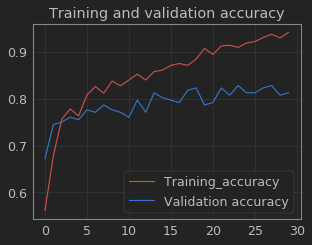

<Figure size 345.6x259.2 with 0 Axes>

<Figure size 345.6x259.2 with 0 Axes>

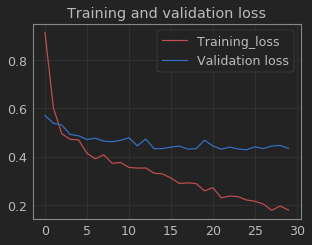

<Figure size 345.6x259.2 with 0 Axes>

In [64]:

acc=VGG16_history.history["accuracy"]
val_acc=VGG16_history.history["val_accuracy"]
loss = VGG16_history.history["loss"]
val_loss = VGG16_history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs , acc , "r",label="Training_accuracy ")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs , loss , "r",label="Training_loss ")
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [106]:
for i, layer in enumerate(transfer_VGG16.layers):
   print(i,"-", layer.name,"-",layer.trainable)


0 - input_22 - False
1 - block1_conv1 - False
2 - block1_conv2 - False
3 - block1_pool - False
4 - block2_conv1 - False
5 - block2_conv2 - False
6 - block2_pool - False
7 - block3_conv1 - False
8 - block3_conv2 - False
9 - block3_conv3 - False
10 - block3_pool - False
11 - block4_conv1 - False
12 - block4_conv2 - False
13 - block4_conv3 - False
14 - block4_pool - False
15 - block5_conv1 - False
16 - block5_conv2 - True
17 - block5_conv3 - True
18 - block5_pool - True
19 - global_max_pooling2d_20 - True
20 - dense_57 - True
21 - dropout_14 - True
22 - dense_58 - True


In [108]:
for layer in transfer_VGG16.layers:
    layer.trainable = False 
for layer in transfer_VGG16.layers[16:]:
    layer.trainable = True
print(len(transfer_VGG16.trainable_variables))
for i, layer in enumerate(transfer_VGG16.layers):
   print(i,"-", layer.name,"-",layer.trainable)
transfer_VGG16.summary()



8
0 - input_22 - False
1 - block1_conv1 - False
2 - block1_conv2 - False
3 - block1_pool - False
4 - block2_conv1 - False
5 - block2_conv2 - False
6 - block2_pool - False
7 - block3_conv1 - False
8 - block3_conv2 - False
9 - block3_conv3 - False
10 - block3_pool - False
11 - block4_conv1 - False
12 - block4_conv2 - False
13 - block4_conv3 - False
14 - block4_pool - False
15 - block5_conv1 - False
16 - block5_conv2 - True
17 - block5_conv3 - True
18 - block5_pool - True
19 - global_max_pooling2d_20 - True
20 - dense_57 - True
21 - dropout_14 - True
22 - dense_58 - True
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv

In [78]:
from tensorflow.keras.optimizers import Adam
transfer_VGG16.compile(loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.0001),
              metrics = ["accuracy"])

VGG16_history=transfer_VGG16.fit(train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs= 30,
    verbose = 1,
    validation_data=valid_generator,
    validation_steps= validation_steps,

)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 3 steps
Epoch 1/30
10/10 [==============================] - 7s 734ms/step - loss: 0.6058 - accuracy: 0.8906 - val_loss: 0.3677 - val_accuracy: 0.8333
Epoch 2/30
10/10 [==============================] - 8s 760ms/step - loss: 0.0880 - accuracy: 0.9758 - val_loss: 0.3867 - val_accuracy: 0.8333
Epoch 3/30
10/10 [==============================] - 7s 741ms/step - loss: 0.1560 - accuracy: 0.9312 - val_loss: 0.4009 - val_accuracy: 0.8490
Epoch 4/30
10/10 [==============================] - 8s 759ms/step - loss: 0.0481 - accuracy: 0.9953 - val_loss: 0.3975 - val_accuracy: 0.8490
Epoch 5/30
10/10 [==============================] - 8s 769ms/step - loss: 0.0206 - accuracy: 0.9992 - val_loss: 0.4177 - val_accuracy: 0.8438
Epoch 6/30
10/10 [==============================] - 7s 741ms/step - loss: 0.3251 - accuracy: 0.9078 - val_loss: 0.3625 - val_accuracy: 0.8385
Epoch 7/30
10/10 [==============================] - 7s 72

KeyboardInterrupt: 